In [1]:
# Enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Search Engine
from langchain_community.tools.tavily_search import TavilySearchResults

# Gemini
from langchain_google_genai import ChatGoogleGenerativeAI

## Search Engine

Searching for the weather in Lahore

In [2]:

search = TavilySearchResults(max_results=2)
search_results = search.invoke("what is the weather in Lahore")
print(search_results)
# If we want, we can create other tools.
# Once we have all the tools we want, we can put them in a list that we will reference later.
tools = [search]

[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'Lahore', 'region': 'Punjab', 'country': 'Pakistan', 'lat': 31.55, 'lon': 74.34, 'tz_id': 'Asia/Karachi', 'localtime_epoch': 1723539007, 'localtime': '2024-08-13 13:50'}, 'current': {'last_updated_epoch': 1723538700, 'last_updated': '2024-08-13 13:45', 'temp_c': 36.6, 'temp_f': 97.9, 'is_day': 1, 'condition': {'text': 'Cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/119.png', 'code': 1006}, 'wind_mph': 7.6, 'wind_kph': 12.2, 'wind_degree': 139, 'wind_dir': 'SE', 'pressure_mb': 1002.0, 'pressure_in': 29.59, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 45, 'cloud': 85, 'feelslike_c': 43.2, 'feelslike_f': 109.8, 'windchill_c': 36.6, 'windchill_f': 97.9, 'heatindex_c': 43.2, 'heatindex_f': 109.8, 'dewpoint_c': 22.8, 'dewpoint_f': 73.1, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 8.0, 'gust_mph': 8.7, 'gust_kph': 14.1}}"}, {'url': 'https://www.weathertab.com/en/c/e/08/islamic-republic-of-pakistan/punjab/lahore

In [3]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4")

## Simple Invoking

In [4]:
from langchain_core.messages import HumanMessage

response = model.invoke([HumanMessage(content="hi!")])
response.content

'Hello! How can I assist you today?'

## Binding the tools

In [5]:
model_with_tools = model.bind_tools(tools)

## Print Tools

In [6]:
response = model_with_tools.invoke([HumanMessage(content="Hi!")])

print(f"ContentString: {response.content}")
print(f"ToolCalls: {response.tool_calls}")

ContentString: Hello! How can I assist you today?
ToolCalls: []


### No tool calls made 

In [7]:
response = model_with_tools.invoke([HumanMessage(content="What's the weather in Lahore?")])

print(f"ContentString: {response.content}")
print(f"ToolCalls: {response.tool_calls}")

ContentString: 
ToolCalls: [{'name': 'tavily_search_results_json', 'args': {'query': 'current weather in Lahore'}, 'id': 'call_ROhmsFE8ZTMS0zcm8x4KhJ4o', 'type': 'tool_call'}]


## Creting a ReAct Agent
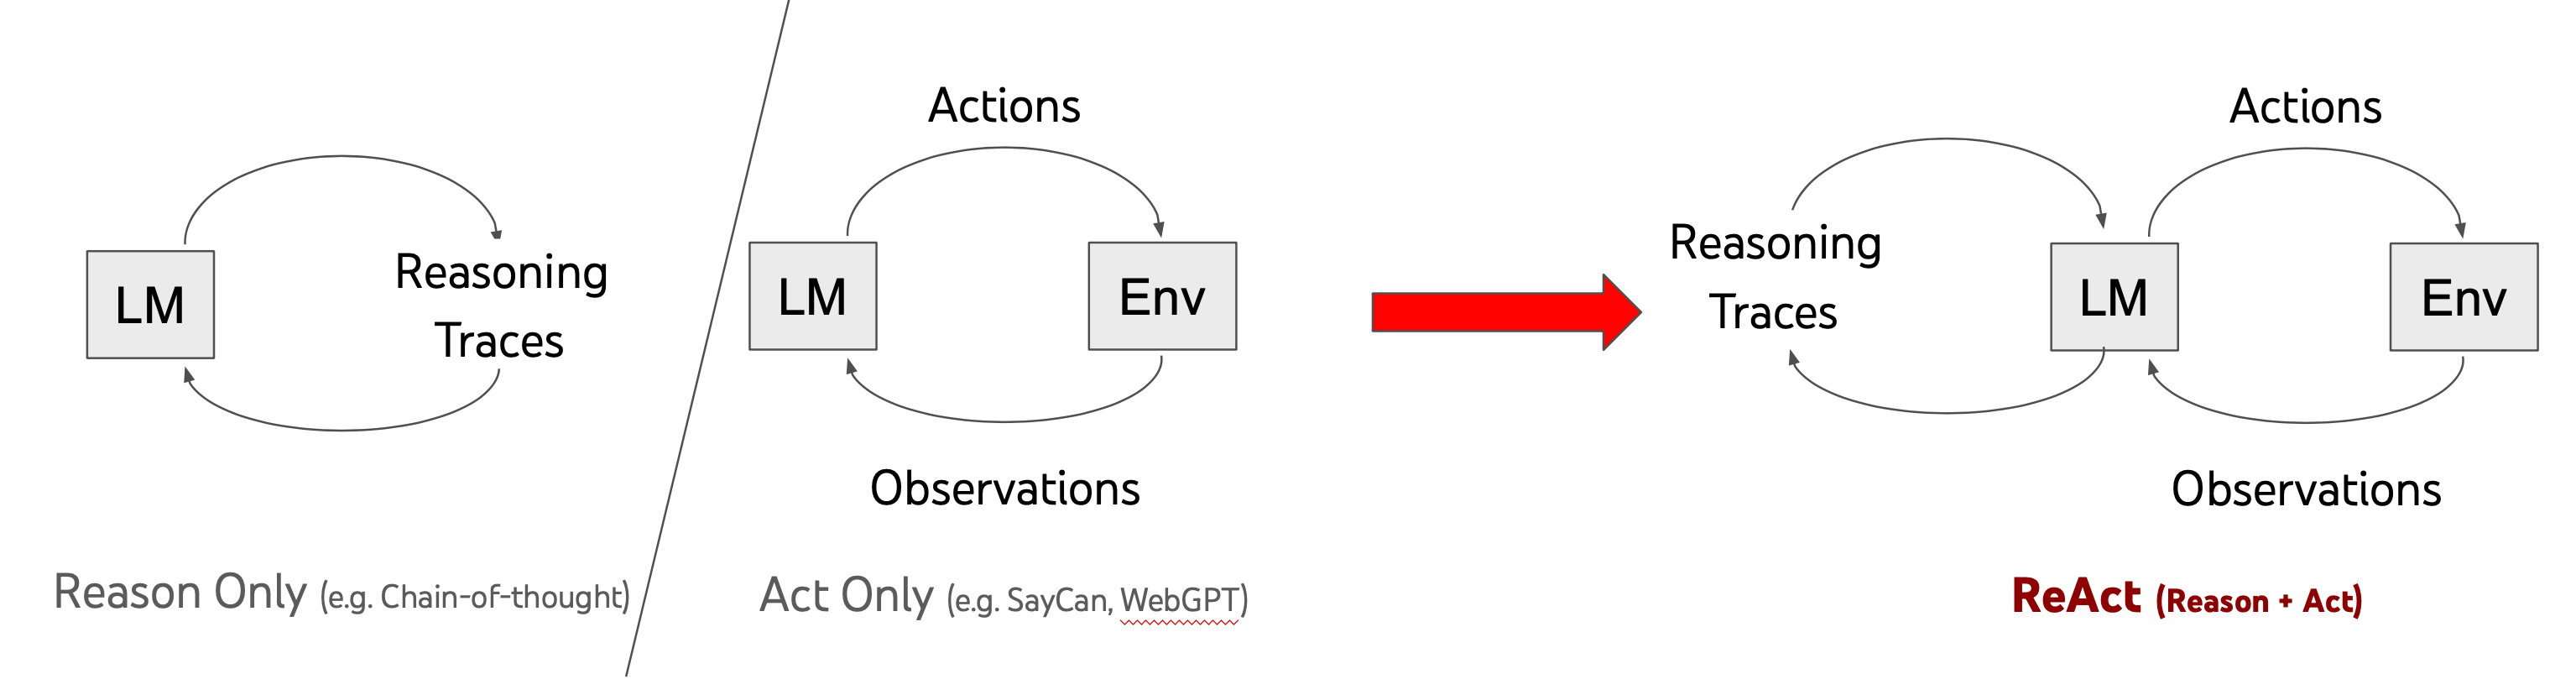

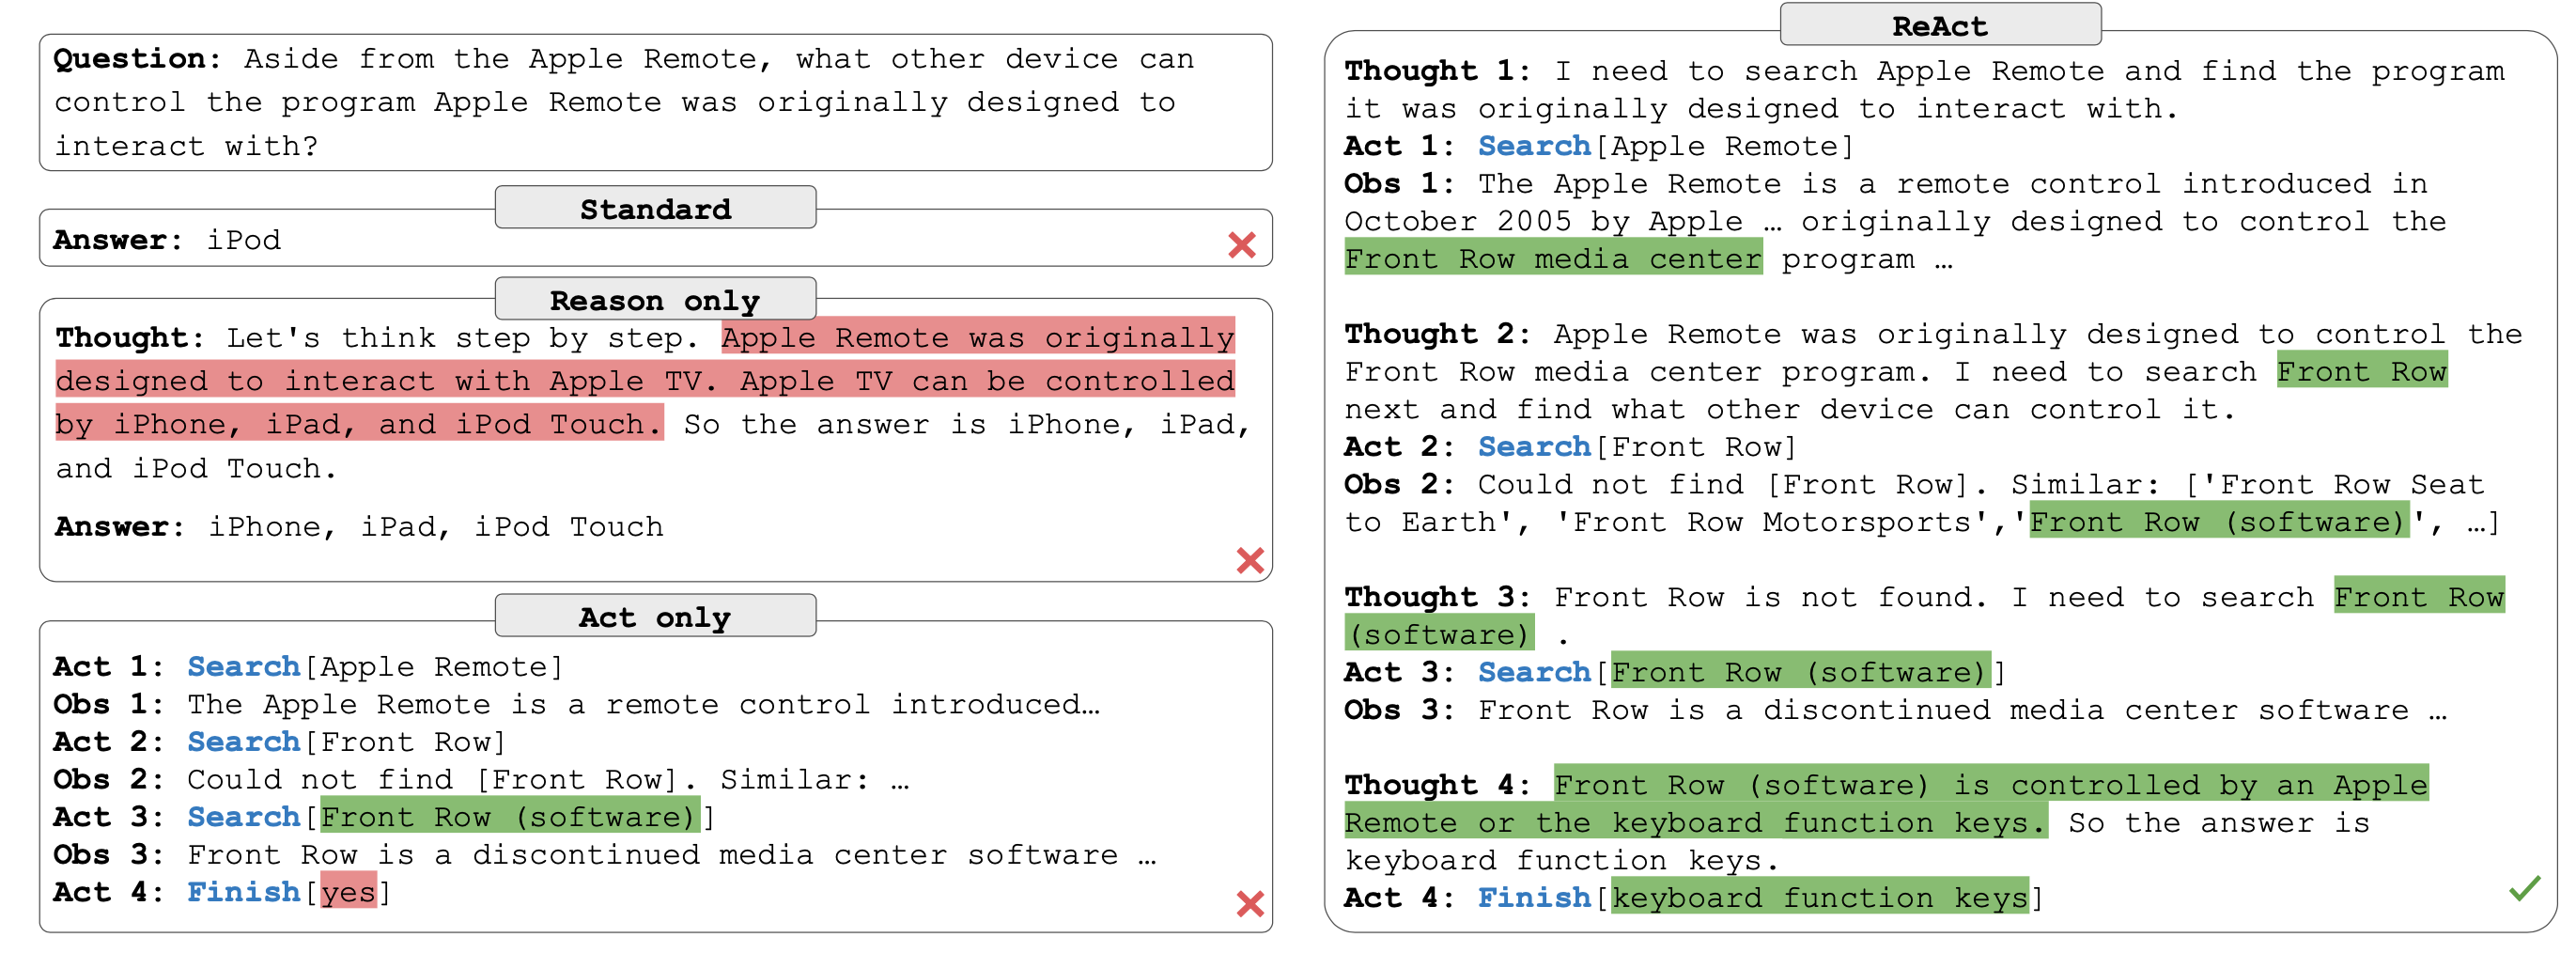

In [8]:
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(model, tools)

In [9]:
response = agent_executor.invoke({"messages": [HumanMessage(content="hi!")]})

response["messages"]

[HumanMessage(content='hi!', id='2e811415-6cc8-43bd-9a37-ea41edf9a709'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 83, 'total_tokens': 93}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-7b42260a-45fa-47ff-a2fa-451252489944-0', usage_metadata={'input_tokens': 83, 'output_tokens': 10, 'total_tokens': 93})]

## Lahore Weather

In [10]:
response = agent_executor.invoke(
    {"messages": [HumanMessage(content="whats the weather in Lahore?")]}
)
response["messages"]

[HumanMessage(content='whats the weather in Lahore?', id='e6af920d-47d8-4e76-8cec-67c07091866f'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qe5NLnkpbPntcwigijrkxCuV', 'function': {'arguments': '{\n  "query": "current weather in Lahore"\n}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 88, 'total_tokens': 110}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0b4d64ce-d780-4e3b-8415-4582e3188911-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current weather in Lahore'}, 'id': 'call_qe5NLnkpbPntcwigijrkxCuV', 'type': 'tool_call'}], usage_metadata={'input_tokens': 88, 'output_tokens': 22, 'total_tokens': 110}),
 ToolMessage(content='[{"url": "https://www.weatherapi.com/", "content": "{\'location\': {\'name\': \'Lahore\', \'region\': \'Punjab\', \'country\': \'Pa

In [14]:
from IPython.display import display,Markdown

display(Markdown(response["messages"][3].content))

The current weather in Lahore, Pakistan is cloudy with a temperature of 36.6°C (97.9°F). The wind is coming from the southeast at a speed of 12.2 kph (7.6 mph). The humidity level is at 45%. Despite the actual temperature, it feels like 43.2°C (109.8°F) due to the heat index. [source](https://www.weatherapi.com/)